 # Explorando datos dataset cambio climático

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt 


In [2]:
data_file="../data/cambio_climatico.csv"
data = pd.read_csv(data_file)
data.shape 


(308, 11)

In [3]:
data.describe(include="all")


Year       Month         MEI         CO2          CH4  \
count   308.000000  308.000000  308.000000  308.000000   308.000000   
mean   1995.662338    6.551948    0.275555  363.226753  1749.824513   
std       7.423197    3.447214    0.937918   12.647125    46.051678   
min    1983.000000    1.000000   -1.635000  340.170000  1629.890000   
25%    1989.000000    4.000000   -0.398750  353.020000  1722.182500   
50%    1996.000000    7.000000    0.237500  361.735000  1764.040000   
75%    2002.000000   10.000000    0.830500  373.455000  1786.885000   
max    2008.000000   12.000000    3.001000  388.500000  1814.180000   

              N2O      CFC-11      CFC-12          TSI    Aerosols        Temp  
count  308.000000  308.000000  308.000000   308.000000  308.000000  308.000000  
mean   312.391834  251.973068  497.524782  1366.070759    0.016657    0.256776  
std      5.225131   20.231783   57.826899     0.399610    0.029050    0.179090  
min    303.677000  191.324000  350.113000  1365.426100    0.001600   -0.282000  
25%    308.111500  246.295500  472.410750  1365.717050    0.002800    0.121750  
50%    311.507000  258.344000  528.356000  1365.980900    0.005750    0.248000  
75%    316.979000  267.031000  540.524250  1366.363250    0.012600    0.407250  
max    322.182000  271.494000  543.813000  1367.316200    0.149400    0.739000

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [5]:
def buscar_nulos(dataframe):
    contador=0
    for columna in dataframe:
        nombre_col = dataframe[columna].name
        cantidad_col = len(dataframe[dataframe[columna].isnull()]) 
        porcentaje_col = (cantidad_col / (1.0*len(data))) * 100
        tipo_col = dataframe[columna].dtype
        if porcentaje_col != 0:
            contador+=1
            print(
                "Columna : {}".format(nombre_col), 
                "nulos {} ({}%)".format(cantidad_col, round(porcentaje_col)),
                "tipo {}".format(tipo_col), 
                sep="\t")
    if contador==0:
        print("No existen valores nulos en el dataframe.")
buscar_nulos(data)


No existen valores nulos en el dataframe.


In [6]:
data.dtypes


Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [7]:
data["Year"].value_counts()


2008    12
2007    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
1983     8
Name: Year, dtype: int64

Cantidad de divisiones 10


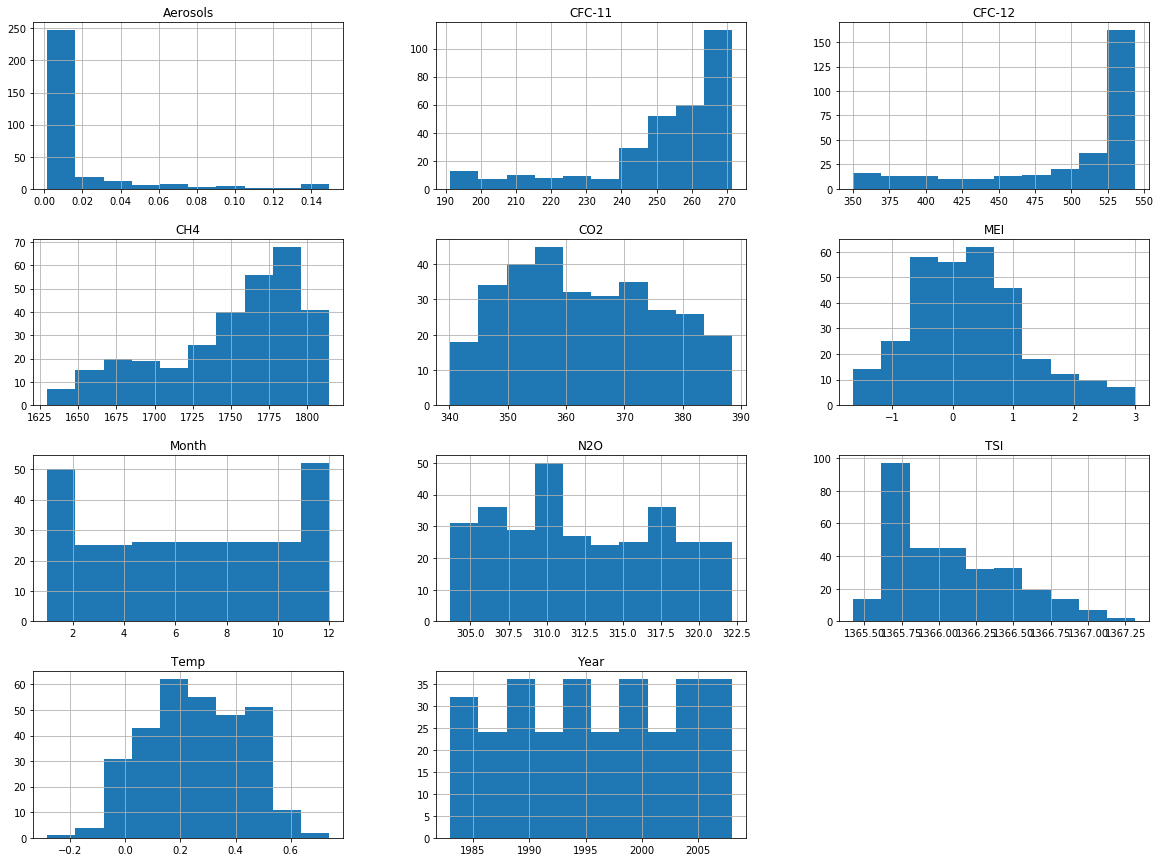

In [8]:
%matplotlib inline
k=int(np.ceil(1+np.log2(len(data))))
print("Cantidad de divisiones", k)
data.hist(bins=k, figsize=(20,15))
plt.show()


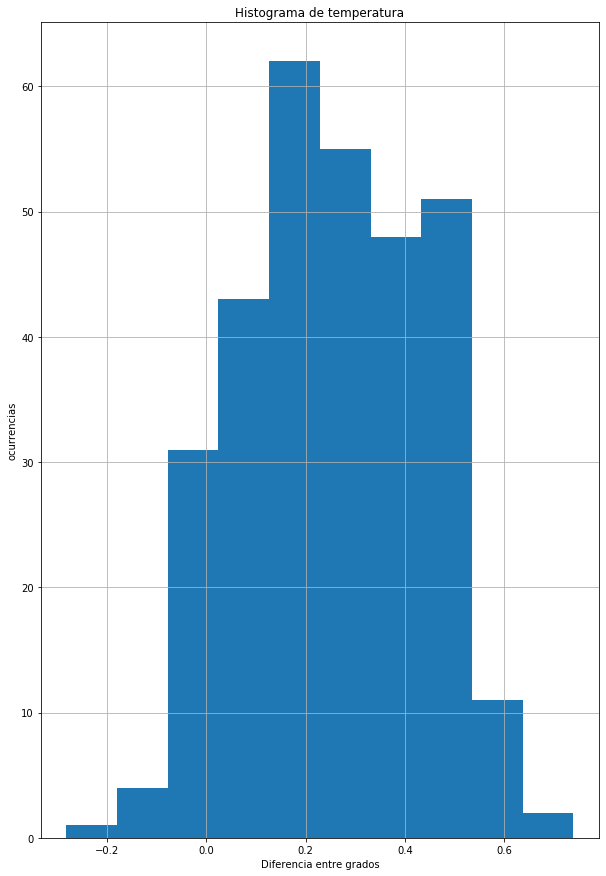

In [9]:
data["Temp"].hist(bins=k, figsize=(10,15))
plt.title("Histograma de temperatura")
plt.xlabel("Diferencia entre grados")
plt.ylabel("ocurrencias")
plt.show()


In [10]:
corr=data.corr()
corr


Year     Month       MEI       CO2       CH4       N2O  \
Year      1.000000 -0.025789 -0.145345  0.985379  0.910563  0.994850   
Month    -0.025789  1.000000 -0.016345 -0.096287  0.017558  0.012395   
MEI      -0.145345 -0.016345  1.000000 -0.152911 -0.105555 -0.162375   
CO2       0.985379 -0.096287 -0.152911  1.000000  0.872253  0.981135   
CH4       0.910563  0.017558 -0.105555  0.872253  1.000000  0.894409   
N2O       0.994850  0.012395 -0.162375  0.981135  0.894409  1.000000   
CFC-11    0.460965 -0.014914  0.088171  0.401284  0.713504  0.412155   
CFC-12    0.870067 -0.001084 -0.039836  0.823210  0.958237  0.839295   
TSI       0.022353 -0.032754 -0.076826  0.017867  0.146335  0.039892   
Aerosols -0.361884  0.014845  0.352351 -0.369265 -0.290381 -0.353499   
Temp      0.755731 -0.098016  0.135292  0.748505  0.699697  0.743242   

            CFC-11    CFC-12       TSI  Aerosols      Temp  
Year      0.460965  0.870067  0.022353 -0.361884  0.755731  
Month    -0.014914 -0.001084 -0.032754  0.014845 -0.098016  
MEI       0.088171 -0.039836 -0.076826  0.352351  0.135292  
CO2       0.401284  0.823210  0.017867 -0.369265  0.748505  
CH4       0.713504  0.958237  0.146335 -0.290381  0.699697  
N2O       0.412155  0.839295  0.039892 -0.353499  0.743242  
CFC-11    1.000000  0.831381  0.284629 -0.032302  0.380111  
CFC-12    0.831381  1.000000  0.189270 -0.243785  0.688944  
TSI       0.284629  0.189270  1.000000  0.083238  0.182186  
Aerosols -0.032302 -0.243785  0.083238  1.000000 -0.392069  
Temp      0.380111  0.688944  0.182186 -0.392069  1.000000

In [11]:
corr["Temp"].sort_values(ascending=True)


Aerosols   -0.392069
Month      -0.098016
MEI         0.135292
TSI         0.182186
CFC-11      0.380111
CFC-12      0.688944
CH4         0.699697
N2O         0.743242
CO2         0.748505
Year        0.755731
Temp        1.000000
Name: Temp, dtype: float64

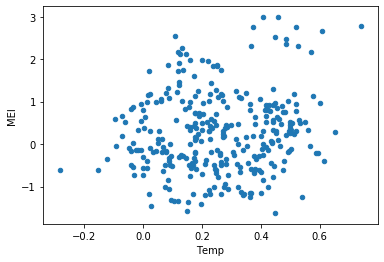

In [12]:
%matplotlib inline
data.plot(kind="scatter",x="Temp", y="MEI")
plt.show()


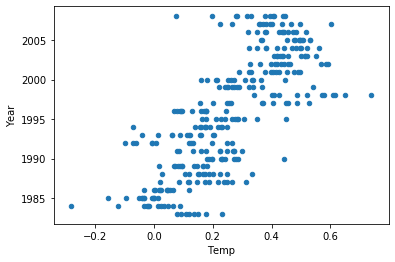

In [13]:
data.plot(kind="scatter",x="Temp", y="Year")
plt.show()


 ## Relación de las variables con la temperatura

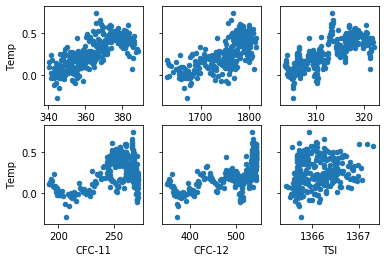

In [14]:
data["Temp"].value_counts()
%matplotlib inline 
figure, axs = plt.subplots(2,3, sharey=True)
data.plot(kind="scatter", x="CO2", y="Temp", ax=axs[0][0])
data.plot(kind="scatter", x="CH4", y="Temp", ax=axs[0][1])
data.plot(kind="scatter", x="N2O",y="Temp", ax=axs[0][2])
data.plot(kind="scatter", x="CFC-11",y="Temp", ax=axs[1][0])
data.plot(kind="scatter", x="CFC-12",y="Temp", ax=axs[1][1])
data.plot(kind="scatter", x="TSI",y="Temp", ax=axs[1][2])
plt.show()


In [15]:
corr["Temp"]

Year        0.755731
Month      -0.098016
MEI         0.135292
CO2         0.748505
CH4         0.699697
N2O         0.743242
CFC-11      0.380111
CFC-12      0.688944
TSI         0.182186
Aerosols   -0.392069
Temp        1.000000
Name: Temp, dtype: float64